<a href="https://colab.research.google.com/github/prathamesh2021u/KlYantra/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:35<00:00, 34.8MB/s]
100% 1.06G/1.06G [00:35<00:00, 31.9MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [23]:
from keras.src.backend import dropout
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history =model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.2474 - accuracy: 0.5607 - val_loss: 0.7666 - val_accuracy: 0.5270
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6541 - accuracy: 0.5997 - val_loss: 0.6258 - val_accuracy: 0.6730
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6269 - accuracy: 0.6546 - val_loss: 0.9196 - val_accuracy: 0.6406
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.5818 - accuracy: 0.6991 - val_loss: 0.5859 - val_accuracy: 0.7034
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.5032 - accuracy: 0.7551 - val_loss: 0.7543 - val_accuracy: 0.6940
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4431 - accuracy: 0.7866 - val_loss: 0.4706 - val_accuracy: 0.7780
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4010 - accuracy: 0.8139 - val_loss: 0.4565 - val_ac

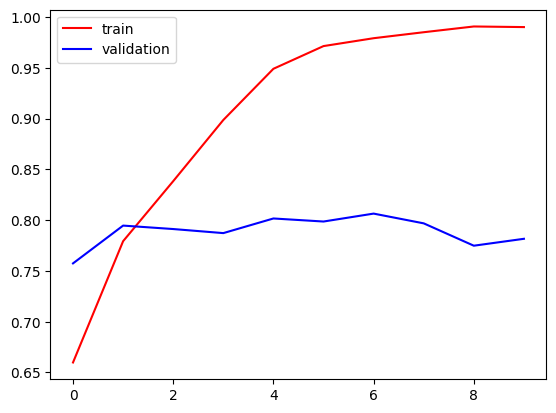

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

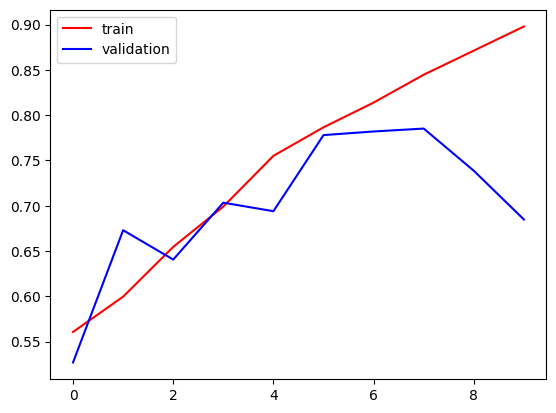

In [27]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

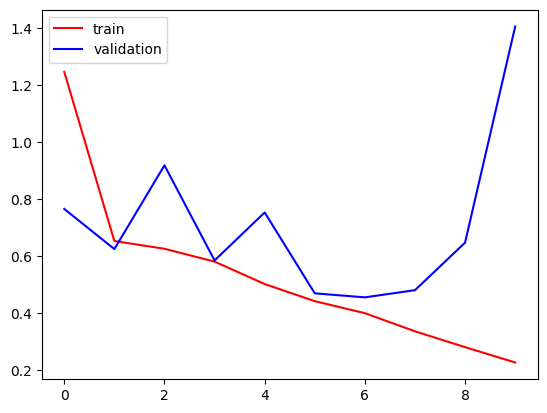

In [28]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [29]:
import cv2

In [30]:
test_img=cv2.imread('/content/dog.jpg')

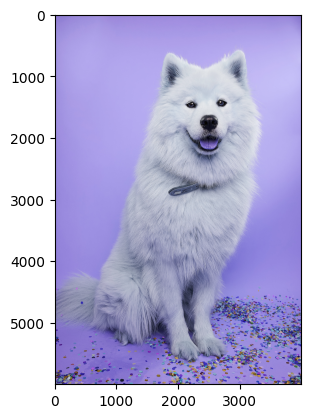

In [31]:
plt.imshow(test_img)

In [32]:
test_img.shape


(6000, 4000, 3)

In [33]:
test_img=cv2.resize(test_img,(256,256))

In [34]:
test_input = test_img.reshape((1,256,256,3))

In [35]:
model.predict(test_input)

1/1 [==============================] - 0s 371ms/step


array([[1.]], dtype=float32)

In [36]:
test_cat=cv2.imread('/content/cat.jpg')

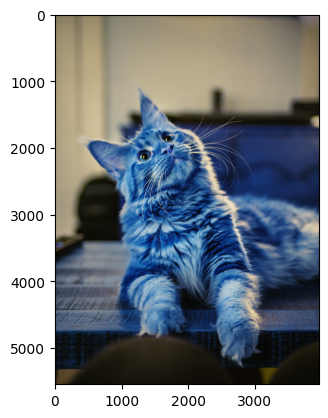

In [37]:
plt.imshow(test_cat)

In [38]:
test_cat.shape

(5546, 3961, 3)

In [39]:
test_cat=cv2.resize(test_cat,(256,256))

In [42]:
test_inpu = test_cat.reshape((1,256,256,3))

In [43]:
model.predict(test_inpu)

1/1 [==============================] - 0s 26ms/step


array([[1.]], dtype=float32)

In [44]:
cat=cv2.imread('/content/cat 1.jpg')

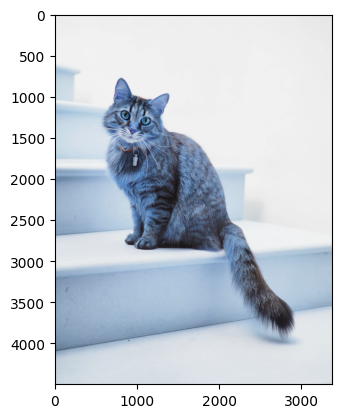

In [45]:
plt.imshow(cat)

In [46]:
cat.shape

(4498, 3374, 3)

In [47]:
cat=cv2.resize(cat,(256,256))

In [48]:
tes = cat.reshape((1,256,256,3))

In [49]:
model.predict(tes)

1/1 [==============================] - 0s 24ms/step


array([[1.]], dtype=float32)